## Overview of the dataset

Reading and visualizing a single sample:


In [7]:
#imports and global variables
import numpy as np
import os
import csv
import pandas as pd
import random
from scipy import stats
from scipy.signal import find_peaks
import json
samples_driving = 2162
samples_sleeping = 2208
samples_watching_tv = 2212

driving_path = './Dataset/driving'
sleeping_path = './Dataset/sleeping'
watching_tv_path = './Dataset/watching_tv'

Sample User Characteristics:
User Id: 3
User Age: 16
User lifesytle: Sedentary
Phone position: On a wristband
accelerometer
gyroscope
location
magnetometer
sound


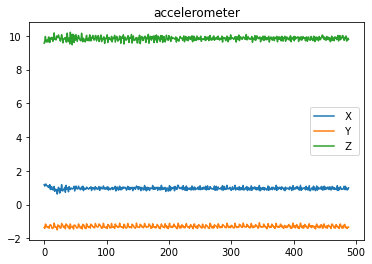

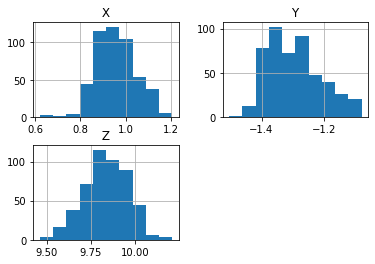

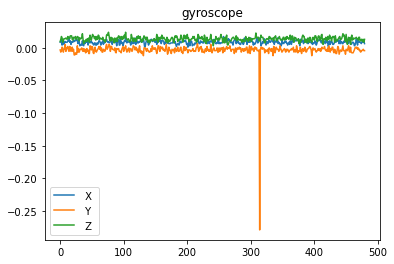

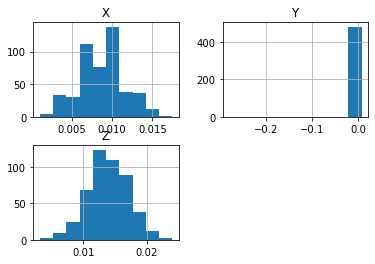

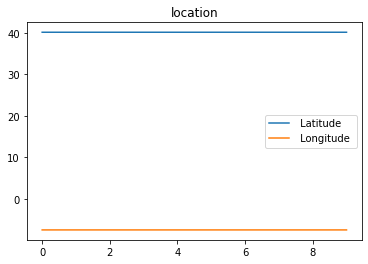

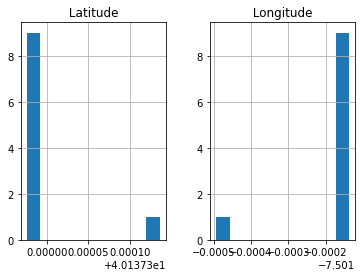

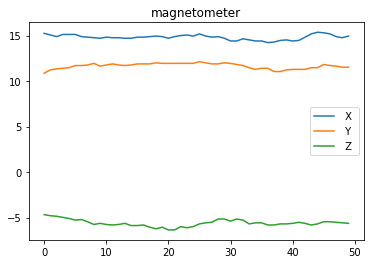

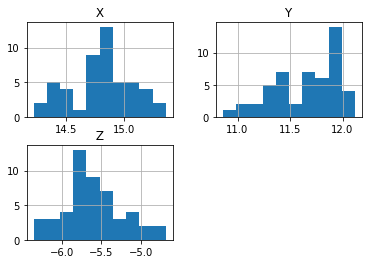

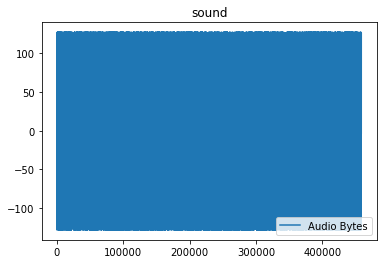

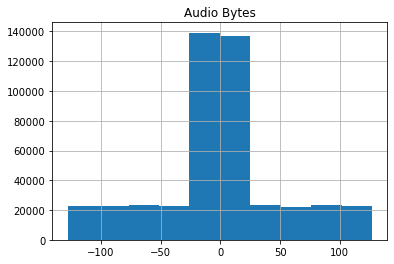

In [9]:
#read all files for random sample and print info
a = random.randint(1,samples_driving)
sample_path = os.path.join(driving_path,str(a))
json_path = os.path.join(sample_path,'data.json')
#read data and visualize
with open(json_path, 'r') as f:
    sample_data =  json.load(f)
    user_id = sample_data['user_id']
    user_age = sample_data['user_age']
    user_lifestyle = sample_data['user_lifestyle']
    mobile_position = sample_data['mobile_device_position']
    sensors = sample_data['sensors']['name']
    print("Sample User Characteristics:")
    print("User Id:",user_id)
    print("User Age:",user_age)
    print("User lifesytle:",user_lifestyle)
    print("Phone position:",mobile_position)
    for file in sensors:
        print(file)
        df = pd.read_csv(os.path.join(sample_path,file+".txt"),'\t')
        if(len(df.columns)>1):
            df = df.iloc[:,1:]
        df.plot(title=file)
        df.hist()

Extracting features from accelerometer data:

In [10]:
#reading all data
sample_list_count = [samples_driving,samples_sleeping,samples_watching_tv]
paths = [driving_path,sleeping_path,watching_tv_path]
alllabels = ['driving','sleeping','watching_tv']
x_values = []
y_values = []
z_values = []
labels = []
print("Reading data...")
for i in range(len(sample_list_count)):
    print("Reading"+paths[i])
    path = paths[i]
    label = alllabels[i]
    for sample in range(sample_list_count[i]):
        if sample==0:
            continue
        sample_path = os.path.join(path,str(sample))
        if not os.path.isdir(sample_path):
            continue
        with open(os.path.join(sample_path,'data.json'),'r') as f:
            sample_data =  json.load(f)
#         user_id = sample_data['user_id']
#         user_age = sample_data['user_age']
#         user_lifestyle = sample_data['user_lifestyle']
#         mobile_position = sample_data['mobile_device_position']
        df = pd.read_csv(os.path.join(sample_path,"accelerometer.txt"),'\t')
        x_values.append(df[' X '])
        y_values.append(df[' Y '])
        z_values.append(df[' Z '])
        labels.append(label)
print('Calculating features...')        
df_new = pd.DataFrame()
df_new['label'] = pd.Series(labels)
#means
df_new['meanX'] = pd.Series(x_values).apply(lambda x: x.mean())
df_new['meanY'] = pd.Series(y_values).apply(lambda x: x.mean())
df_new['meanZ'] = pd.Series(z_values).apply(lambda x: x.mean())
#stdev
df_new['stddevX'] = pd.Series(x_values).apply(lambda x: x.std())
df_new['stddevY'] = pd.Series(y_values).apply(lambda x: x.std())
df_new['stddevZ'] = pd.Series(z_values).apply(lambda x: x.std())
#average abs diff mean
df_new['aadmX'] = pd.Series(x_values).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
df_new['aadmY'] = pd.Series(y_values).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
df_new['aadmZ'] = pd.Series(z_values).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
#min
df_new['minX'] = pd.Series(x_values).apply(lambda x: x.min())
df_new['minY'] = pd.Series(y_values).apply(lambda x: x.min())
df_new['minZ'] = pd.Series(z_values).apply(lambda x: x.min())
#max
df_new['maxX'] = pd.Series(x_values).apply(lambda x: x.max())
df_new['maxY'] = pd.Series(y_values).apply(lambda x: x.max())
df_new['maxZ'] = pd.Series(z_values).apply(lambda x: x.max())
#max-min
df_new['maxminX'] = pd.Series(x_values).apply(lambda x: x.max()-x.min())
df_new['maxminY'] = pd.Series(y_values).apply(lambda x: x.max()-x.min())
df_new['maxminZ'] = pd.Series(z_values).apply(lambda x: x.max()-x.min())
#median
df_new['medX'] = pd.Series(x_values).apply(lambda x: np.median(x))
df_new['medY'] = pd.Series(y_values).apply(lambda x: np.median(x))
df_new['medZ'] = pd.Series(z_values).apply(lambda x: np.median(x))
#kurtosis
df_new['kurtX'] = pd.Series(x_values).apply(lambda x: stats.kurtosis(x))
df_new['kurtY'] = pd.Series(y_values).apply(lambda x: stats.kurtosis(x))
df_new['kurtZ'] = pd.Series(z_values).apply(lambda x: stats.kurtosis(x))
#skewness
df_new['skewX'] = pd.Series(x_values).apply(lambda x: stats.skew(x))
df_new['skewY'] = pd.Series(y_values).apply(lambda x: stats.skew(x))
df_new['skewZ'] = pd.Series(z_values).apply(lambda x: stats.skew(x))

print(df_new.head())

Reading data...
Reading./Dataset/driving
Reading./Dataset/sleeping
Reading./Dataset/watching_tv
Calculating features...
     label     meanX     meanY      meanZ   stddevX   stddevY   stddevZ  \
0  driving  1.296465 -1.352851  10.379128  0.113335  0.140935  0.114491   
1  driving  2.410300 -1.390200   9.869700  2.628697  0.660814  0.912281   
2  driving  1.601000 -1.144900  10.132200  1.539638  0.629815  1.485222   
3  driving  2.311500 -1.018400  10.125300  0.712549  0.195077  0.426559   
4  driving  2.472200 -0.803100  10.121600  1.241059  0.452486  1.284166   

      aadmX     aadmY     aadmZ  ...  maxminZ    medX    medY     medZ  \
0  0.090304  0.115151  0.092717  ...    0.900  1.2875 -1.3400  10.3810   
1  2.351100  0.564560  0.695500  ...    3.132  2.5040 -1.5700   9.8635   
2  1.269200  0.440500  1.294800  ...    4.338  2.4035 -1.1775   9.7250   
3  0.547900  0.157000  0.308640  ...    1.465  2.3170 -1.0100  10.2275   
4  0.969200  0.324860  0.954800  ...    4.569  2.3555 -0.85

Visualizing feature data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200161C51C0>,
      dtype=object)

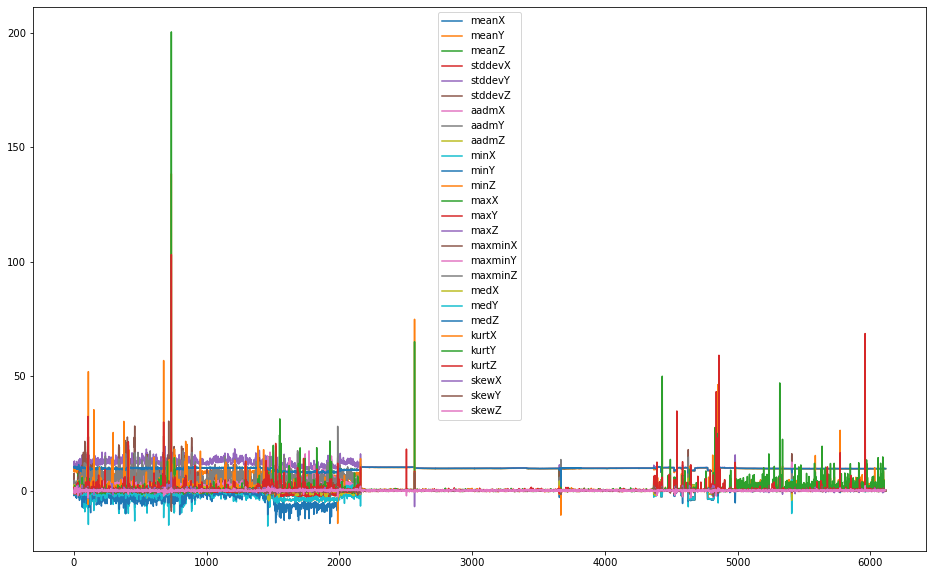

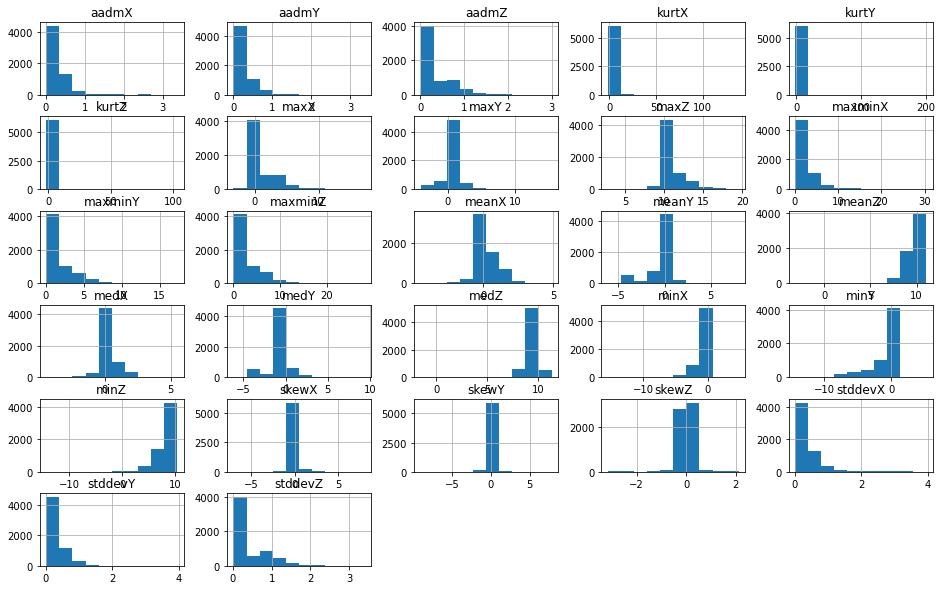

In [16]:
df_new.plot(figsize=(16,10))
df_new.hist(figsize=(16,10))

Classification on accelerometer features:

Accuracy: 0.8795640326975477

 -------------Classification Report-------------

              precision    recall  f1-score   support

     driving       1.00      0.98      0.99       669
    sleeping       0.76      0.99      0.86       660
 watching_tv       0.95      0.60      0.74       506

    accuracy                           0.88      1835
   macro avg       0.90      0.86      0.86      1835
weighted avg       0.90      0.88      0.87      1835



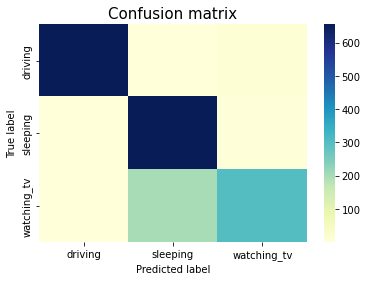

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

train, test = train_test_split(df_new, test_size=0.3)

train_data = train.iloc[:,1:]
train_labels = train.iloc[:,0]
test_data = test.iloc[:,1:]
test_labels = test.iloc[:,0]

scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


lr = LogisticRegression(random_state = 1,max_iter=100000)
lr.fit(train_data, train_labels)
y_pred = lr.predict(test_data)
print("Accuracy:", accuracy_score(test_labels, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(test_labels, y_pred))

confusion_matrix = confusion_matrix(test_labels, y_pred)
seaborn.heatmap(confusion_matrix, xticklabels=alllabels, yticklabels=alllabels,cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()